## scikit-learn中的多项式回归和Pipeline

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)    

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [7]:
X[:5,:]

array([[ 0.71117835],
       [-2.13268295],
       [-2.03820533],
       [-1.01470042],
       [-1.97136216]])

In [8]:
X2[:5,:]

array([[ 1.        ,  0.71117835,  0.50577465],
       [ 1.        , -2.13268295,  4.54833658],
       [ 1.        , -2.03820533,  4.15428098],
       [ 1.        , -1.01470042,  1.02961695],
       [ 1.        , -1.97136216,  3.88626875]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

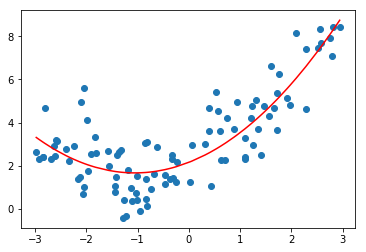

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg2.coef_

array([0.        , 0.93286432, 0.44322732])

In [12]:
lin_reg2.intercept_

2.1571590293312344

### 关于PolynomialFeatures

In [13]:
X = np.arange(1, 11).reshape(-1, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [18]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

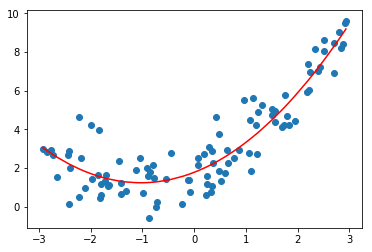

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()